<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0578
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066  
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0078e-04 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5491e-05 
Epoch 16/100
9/9 ━━━━━━━

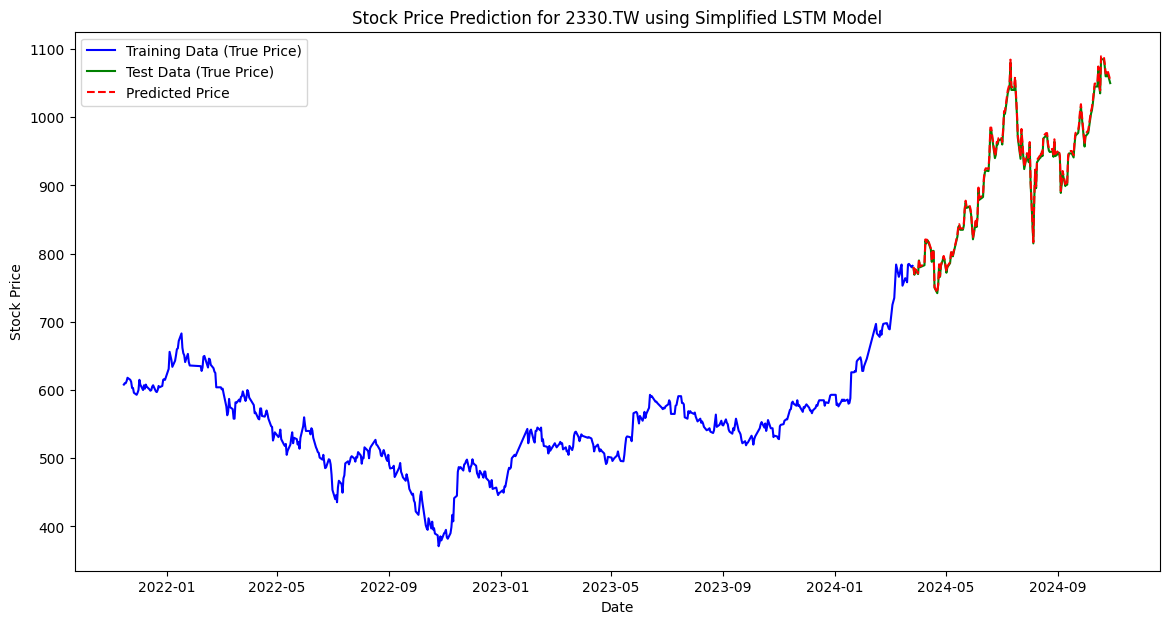

In [8]:
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# 設定股票資料參數
stock_id = '2330.TW'
end = dt.date.today()
start = end - dt.timedelta(days=1080)

# 下載股票數據
df = yf.download(stock_id, start=start, end=end).reset_index()

# 提取收盤價和日期
dates = df['Date']
prices = df['Close'].values.reshape(-1, 1)

# 正規化數據
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

# 分割訓練和測試數據
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# 構建簡單的LSTM模型
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(train_data.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
train_data_reshaped = train_data.reshape((train_data.shape[0], 1, 1))
model.fit(train_data_reshaped, train_data, batch_size=64, epochs=100, verbose=1)

# 預測結果
train_predict = model.predict(train_data_reshaped)
test_data_reshaped = test_data.reshape((test_data.shape[0], 1, 1))
test_predict = model.predict(test_data_reshaped)

# 逆轉標準化
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

# 繪製結果圖
plt.figure(figsize=(14, 7))
plt.plot(dates[:train_size], train_data, color="blue", label="Training Data (True Price)")
plt.plot(dates[train_size:], test_data, color="green", label="Test Data (True Price)")
plt.plot(dates[train_size:], test_predict, color="red", linestyle='--', label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_id} using Simplified LSTM Model")
plt.legend()
plt.show()
